# Análise de Dados Meteorológicos
Caracterizar a meteorologia do lugar, não só da superfície, mas de sondagem para obter o perfil de temperatura.

## Caracterizaçao Meteorológica
* Meteorologia de superfície (estação meteorológica);
* Perfil vertical da atmosfesta (sondagem).

Precisamos saber os dois em conjunto, para conseguir as informações de:
1) Direção do transporte de poluentes: para saber para onde a pluma está indo.
2) Turbulência mecânica e convectiva: para saber o comportamento da pluma, como o poluente se espalha.
3) Camada poluente: para saber aonde vai se dispersar.

Obs: Precisamos também saber das propriedades do solo, para ver como se comporta recebendo a radiação solar, se esquenta mais ou menos.

Caracterização da superfície:
* Albedo;
* Razão Bower;
* Rugosidade.

Dados necessários:
* Estação meteorológica convencional;
* Sondagem atmosférica.

Obs: Como obter acesso a esses dados? Todos os dados de aeroportos do Brasil cadastrados, compilando meteorologia de superfície desses locais.

Requisitos para meteorologia de superfície - estação meteorológica (medição estática):
* Dados de temperatura;
* Pressão atmosférica;
* Velocidade do vento;
* Direção do vento;
* Umidade;
* Cobertura de nuvens;

Requisitos sondagem (medição conforme vai subindo o balão):
* Temperatura;
* Pressão;
* Velocidade do vento;
* Direção do vento.

Sondagem só existe em aeroporto, então para locais que não possuem aeroporto, podemos:
* Utilizar os dados do aeroporto mais próximos;
* Procurar cruzar dados com locais com características de altitude e climáticas parecidas;

Obs: Recomenda-se utilizar os dados de um modelo meteorológico para saber as condições atmosféricas do local.

**Pontos mais importantes: perfil de temperatura, meteorologia de superfície e caracterização da superfície.**

## Utilizar a plataforma do prof para baixar esses dados: 


wd: direção do vento
ws: velocidade do vento
hc: altura da cobertura de nuvens
cop: cobertura de nuvens
relh: umidade relativa

# Caracterização meteorlógica da área em estudo
Autor: Suelen Silva Oliveira

Nesta atividade caracterizaremos a meteorologia da área em estudo. Avaliaremos os seguintes pontos:
1) Meteorologia de superfície
2) Meteorologia upperair ou sondagem/perfil da atmosfera
3) Superfície - Albedo, razão de Bowen e Rugosidade

## Metorologia de superfície
Analisaremos os dados de metar (estação meteorlógicas de aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR \
(BRAIN -> Get METAR -> Estação de Florianópolis)

Coletar dados para o período de 01/01/2023 a 01/01/2024 e 01/01/2022 a 01/01/2023.

Obs:
* Colocar os dados na pasta de inputs em nova pasta "meteoSuperficie"
* Nomenclatura da "metar_2023.csv"

In [29]:
# Selecionar arquivo para a análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print (metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

r'C:\Users\vinicius\Documents\ENS5173_202401'
r'C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie'

C:\Users\vinicius\Documents\ENS5173_202401
C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


'C:\\Users\\vinicius\\Documents\\ENS5173_202401\\inputs\\meteoSuperficie'

In [30]:
# Abrindo os arquivos metar
import pandas as pd

metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [31]:
# Criar uma coluna com DateTime dos dados

#Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day','hour']])
print(metSuperficie['datetime'])          

metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 26251, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


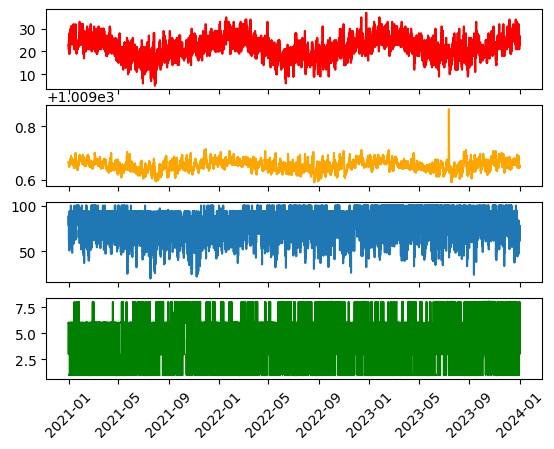

In [32]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color = 'green')

ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo

# metSuperficie['temp'].plot(ax=ax[0]) #uma forma de criar figura

Com esta figura podemos avaliar os dados, por exemplo no gráfico em amarelo, temos um dado bem fora do comum, o que indica uma medição errada, conseguimos retirar esse dado.

In [33]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

print(media_mensal)

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2021-01-31  16.000000    1.0  2021.0  11.500000 NaN  214.774965  3.575005   
2021-02-28  14.500000    2.0  2021.0  11.500000 NaN  197.668222  3.371675   
2021-03-31  15.975741    3.0  2021.0  11.513477 NaN  224.959212  3.361566   
2021-04-30  15.500000    4.0  2021.0  11.500000 NaN  202.069544  3.382410   
2021-05-31  16.000000    5.0  2021.0  11.500000 NaN  230.860097  3.062866   
2021-06-30  15.500000    6.0  2021.0  11.500000 NaN  223.320988  3.332454   
2021-07-31  16.000000    7.0  2021.0  11.500000 NaN  246.718310  3.184159   
2021-08-31  16.000000    8.0  2021.0  11.500000 NaN  230.422406  3.678955   
2021-09-30  15.500000    9.0  2021.0  11.500000 NaN  231.086331  4.086376   
2021-10-31  16.343490   10.0  2021.0  11.515235 NaN  197.640862  4.067635   
2021-11-30  15.500000   11.0  2021.0  11.500000 NaN  200.488045  4.130533   

C:\Users\vinicius\AppData\Local\Temp\ipykernel_10980\2282380692.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


## Boxplot
* Mostra quantos % dos dados estão mais próximos a um valor, então tem uma caixa que representa uma região com mais dados, e mostra uma porcentagem de valor mais discrepante;
* As bolinhas representam um valor que quase nunca aconteça (fora da faixa entre 0,5% a 99,5%), eventos muitos raros;
* Eixo y são os valores a box representa as probabilidades;
* Valores isolados, ou seja, bolinhas isoladas, representam valores discrepantes, e esses podemos remover.

O percentil 99 da temperarura é:31.0
O percentil 99 da pressão é:1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x2b0e9e421d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b0e9e40390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b0e9db8b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2b0e9e42f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b0ea1325d0>],
 'means': []}

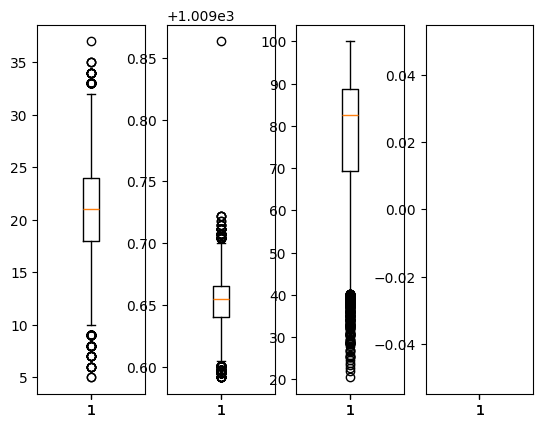

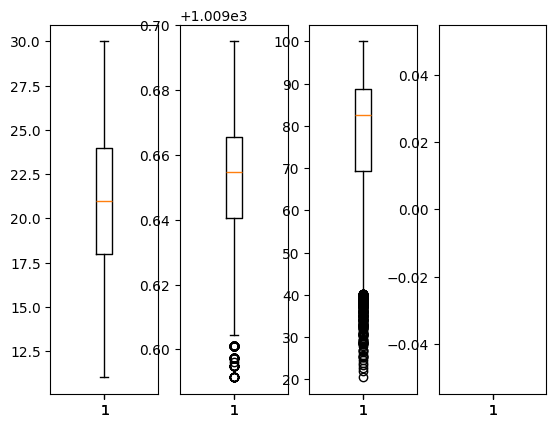

In [39]:
# Fazendo boxplot das variáveis

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 99° do gráfico
import numpy as np #importando a biblioteca

temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperarura é:'+str(temp99))

# para excluir os dados de NaN eu posso usar np.nanpercentile
# para plotar os valores que não são NaN, uso [~np.isnan(metSuperficie['temp'])]

p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
#ele cria uma matriz de verdadeiros e falsos, vendo qual valor respeita esse percentil, quando é verdadeiro usa o valor, se não ignora.
#ax[1].boxplot(metSuperficie['p'][metSuperficie['p']<p99])
#outra forma de remover sem criar variável.
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                    (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))])
ax[1].boxplot(metSuperficie['p'][metSuperficie['p']<p99])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Posso fazer direto no plot, ou posso definir as variáveis.

C:\Users\vinicius\AppData\Local\Temp\ipykernel_10980\1876737455.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


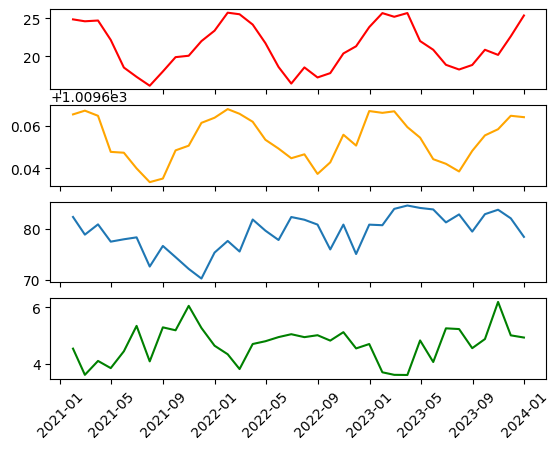

In [40]:
# Estatísticas dos dados
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

#Criando figuras após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'], color = 'red')
ax[1].plot(media_mensal.index,media_mensal['p'], color = 'orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'], color = 'green')

ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

Analisar a mudanças de temperaturas, pressão e etc, durante as estações do ano. Podemos plotar também as mínimas e médias mensais no mesmo gráfico, fazendo uma mancha/sombra/intervalo de confiança ao redor da média.

## Rosa dos ventos

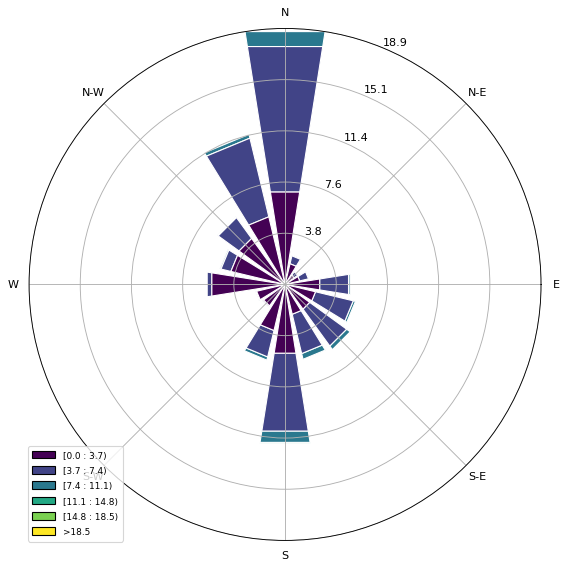

In [41]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

## Análise upperair/sondagem/perfil da atmosfera (pacote siphon)
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.\
Serve para fazer "request" de dados meteorológicos para usar diretamento no python. Compila e extrai dados meteorológicos. Consigo usar dados de radar, upper air, e etc.